In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.patches as mpatches
%matplotlib widget

In [2]:
path = r'C:\Users\Manvydas\Downloads\OneDrive_2023-10-10\2 praktinė užduotis Principiniai komponentai\dat'
names = os.listdir(path)
namesspectraN = [x for x in names if '.dat' in x and 'N_' in x]
print(namesspectraN)
namesspectraT = [x for x in names if '.dat' in x and 'T_' in x]
print(namesspectraT)

['N_P20_T.0.dat', 'N_P21_T.0.dat', 'N_P22_T.0.dat', 'N_P23_T.0.dat', 'N_P24_T.0.dat', 'N_P25_T.0.dat', 'N_P26_T.0.dat', 'N_P27_T.0.dat', 'N_P28_T.0.dat', 'N_P29_T.0.dat', 'N_P30_T.0.dat', 'N_P31_T.0.dat', 'N_P32_T.0.dat', 'N_P33_T.0.dat', 'N_P34_T.0.dat', 'N_P35_T.0.dat', 'N_P36_T.0.dat', 'N_P37_T.0.dat', 'N_P38_T.0.dat', 'N_P39_T.0.dat', 'N_P40_T.0.dat', 'N_P41_T.0.dat', 'N_P42_T.0.dat', 'N_P44_T.0.dat', 'N_P45_T.0.dat', 'N_P46_T.0.dat', 'N_P47_T.0.dat', 'N_P48_T.0.dat', 'N_P49_T.0.dat', 'N_P51_T.0.dat', 'N_P52_T.0.dat', 'N_P53_T.0.dat', 'N_P54_T.0.dat', 'N_P55_T.0.dat', 'N_P57_T.0.dat', 'N_P58_T.0.dat', 'N_P59_T.0.dat', 'N_P61_T.0.dat', 'N_P62_T.0.dat', 'N_P63_T.0.dat', 'N_P64_T.0.dat', 'N_P65_T.0.dat', 'N_P67_T.0.dat', 'N_P68_T.0.dat', 'N_P69_T.0.dat', 'N_P70_T.0.dat', 'N_P71_T.0.dat', 'N_P72_T.0.dat', 'N_P73_T.0.dat']
['T_P21_T.0.dat', 'T_P23_T.0.dat', 'T_P24_T.0.dat', 'T_P25_T.0.dat', 'T_P26_T.0.dat', 'T_P27_T.0.dat', 'T_P28_T.0.dat', 'T_P30_T.0.dat', 'T_P31_T.0.dat', 'T_P33_T.0.d

C:\Users\Manvydas\AppData\Local\Temp\ipykernel_9672\1059056352.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data
C:\Users\Manvydas\AppData\Local\Temp\ipykernel_9672\1059056352.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data
C:\Users\Manvydas\AppData\Local\Temp\ipykernel_9672\1059056352.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

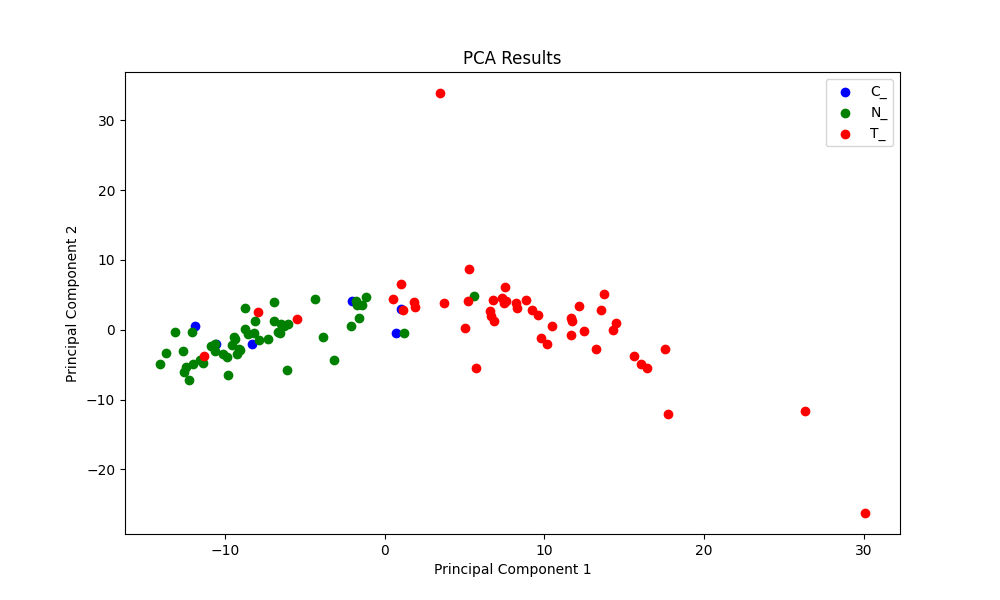

Explained Variance: [101.61476313  41.74056099  32.48359714  30.67611638  12.79475876]
Explained Variance Ratio: [0.39151183 0.16082233 0.12515615 0.1181921  0.04929696]
Cumulative Variance Ratio: [0.39151183 0.55233416 0.67749031 0.79568241 0.84497938]


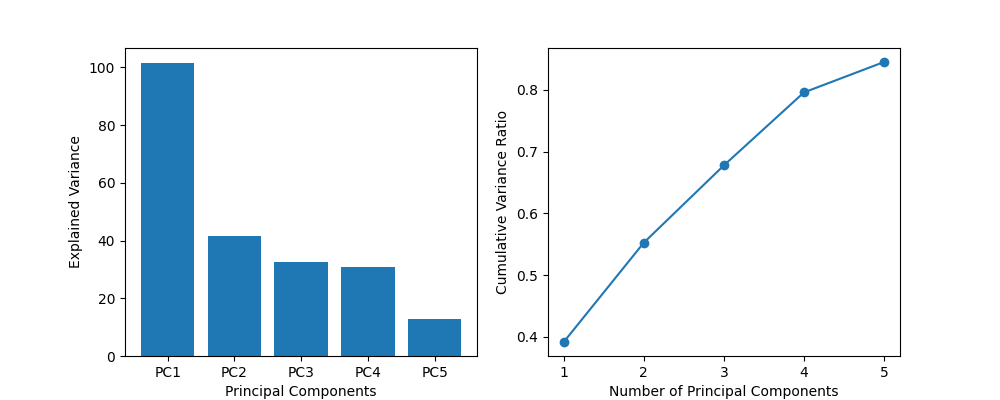

In [4]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# plt.style.use('dark_background')
# Define the directory containing your data files
data_dir = path
names = os.listdir(path)
data_files = [x for x in names if '.dat' in x]

# Create an empty DataFrame to store the combined data

combined_data = pd.DataFrame()
handles = []  # Store legend handles
labels = []  # Store legend labels


# Load the first file to get the first axis data
first_file = pd.read_csv(path + '\\' + data_files[0], delim_whitespace=True)
first_axis = first_file.iloc[:, 0]

# Add the first axis data to the combined DataFrame
combined_data['WL'] = first_axis

# Define a dictionary to map sample names to colors
sample_colors = {'N_': 'green', 'T_': 'red', 'C_': 'blue'}

# Loop through the remaining files and add their spectra data to the combined DataFrame
for data_file in data_files:
    data = pd.read_csv(path + '\\' + data_file, delim_whitespace=True)
    spectrum_data = data.iloc[:, 1]
    combined_data[data_file] = spectrum_data

# Standardize the data for PCA
scaler = StandardScaler()
X_std = scaler.fit_transform(combined_data.iloc[:, 1:].transpose())

# Perform PCA
n_components = 5  # Number of components you want to keep
PCAx = 0
PCAy = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()


# Create a scatter plot to visualize the PCA results with colors based on sample names
plt.figure(figsize=(10, 6))
for i, data_file in enumerate(data_files):
    # color = 'blue'  # Default to 'blue'
    for sample_name, sample_color in sample_colors.items():
        if sample_name in data_file:
            color = sample_color
            break
    if sample_name not in handles: 
        scatter = plt.scatter(principal_components[i, PCAx], principal_components[i, PCAy], color=color, label = sample_name)
        handles.append(sample_name)
    else: 
        scatter = plt.scatter(principal_components[i, PCAx], principal_components[i, PCAy], color=color)


# Show the plot
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print and plot explained variance, explained variance ratio, and cumulative variance ratio
print(f'Explained Variance: {explained_variance}')
print(f'Explained Variance Ratio: {explained_variance_ratio}')
print(f'Cumulative Variance Ratio: {cumulative_variance_ratio}')

# Plot explained variance and cumulative variance ratio
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.bar(range(1, n_components + 1), explained_variance, tick_label=[f'PC{i}' for i in range(1, n_components + 1)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.subplot(122)
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


C:\Users\Manvydas\AppData\Local\Temp\ipykernel_9672\2738966847.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data
C:\Users\Manvydas\AppData\Local\Temp\ipykernel_9672\2738966847.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data


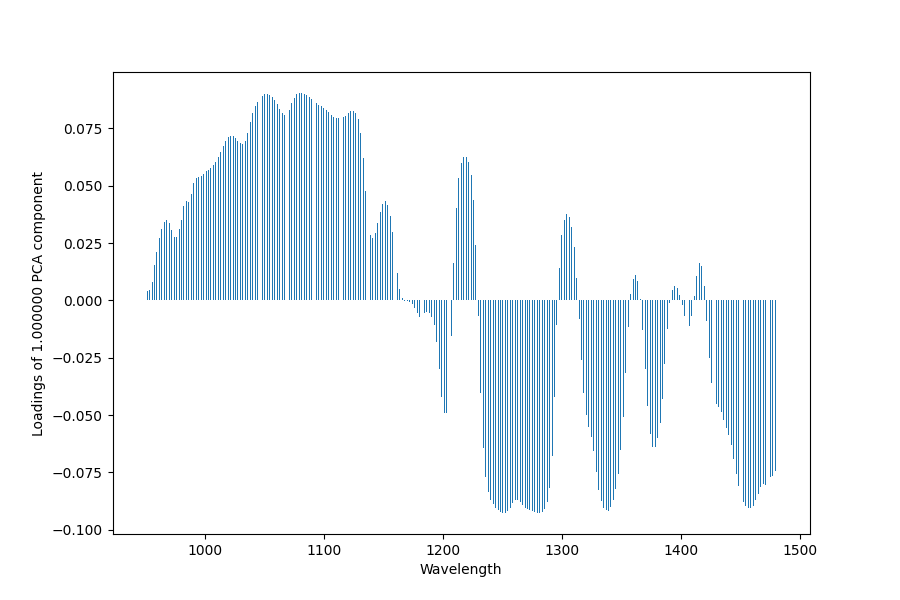

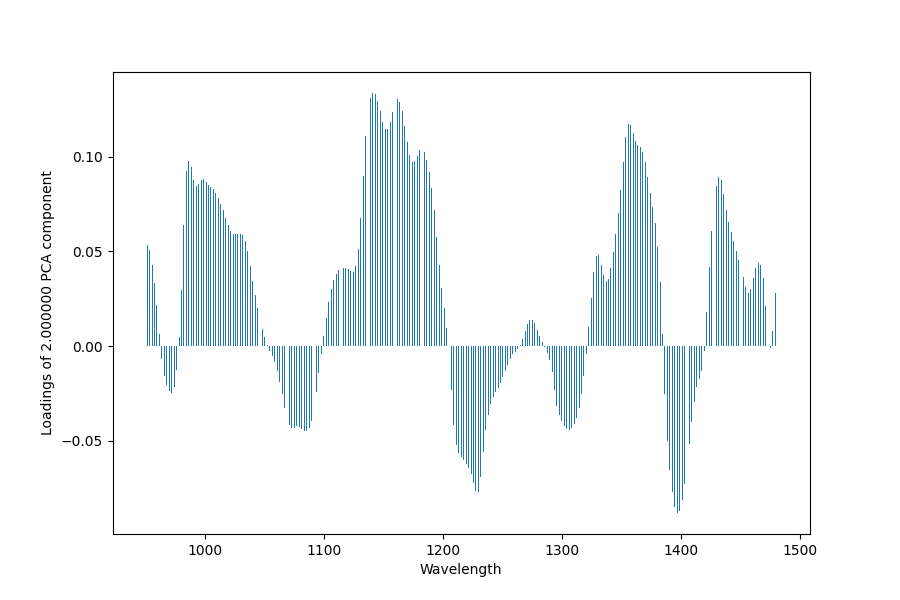

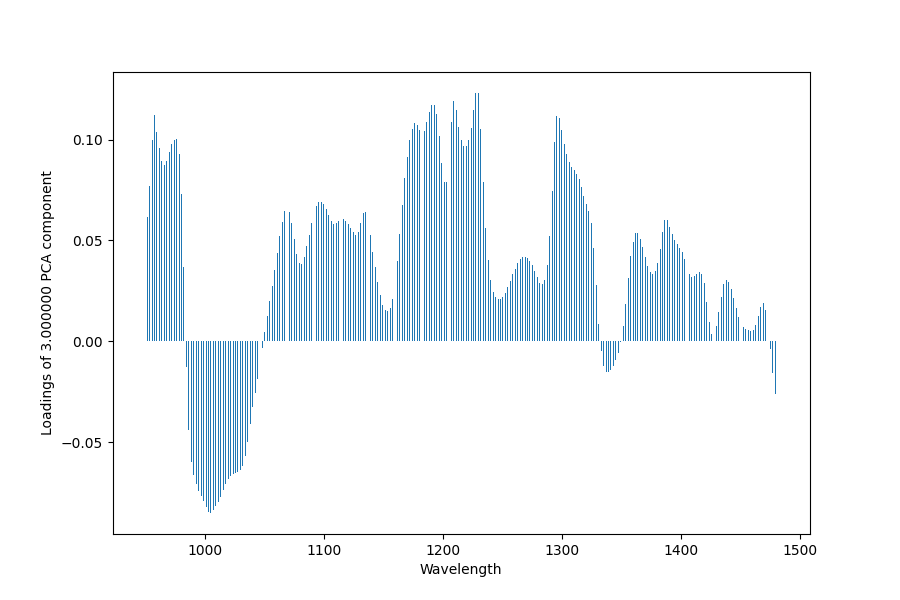

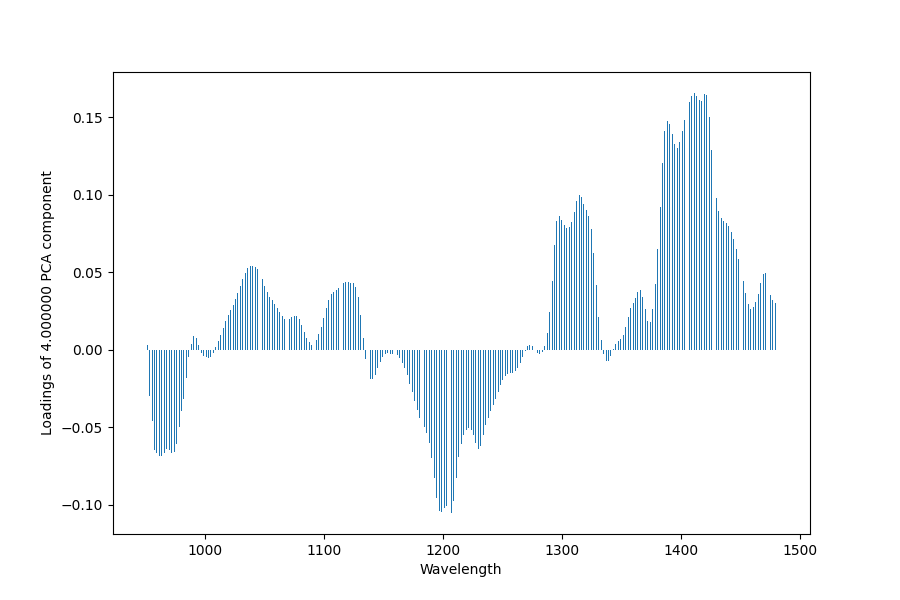

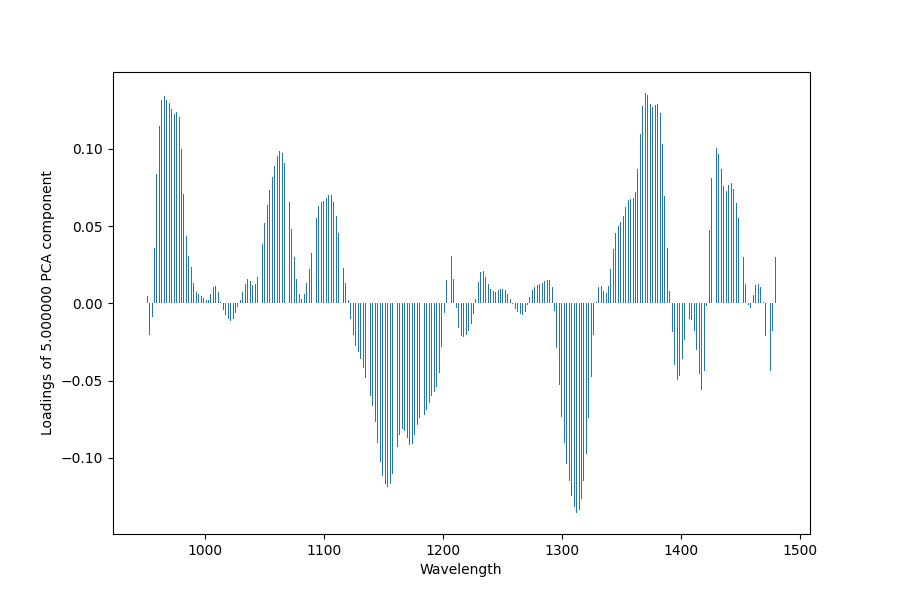

In [24]:

import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the directory containing your data files
data_dir = path
names = os.listdir(path)
data_files = [x for x in names if '.dat' in x]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through the files and add their spectra data to the combined DataFrame
for data_file in data_files:
    data = pd.read_csv(path + '\\' + data_file, delim_whitespace=True, header = None, names = ['WL', 'data'])
    spectrum_data = data.iloc[:, 1]
    combined_data[data_file] = spectrum_data

# Standardize the data for PCA
scaler = StandardScaler()
X_std = scaler.fit_transform(combined_data.iloc[:, 1:].transpose())

# Perform PCA
n_components = 5  # Number of components you want to keep
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_std)

# Get the loadings (contributions of wavelengths to principal components)
loadings = pca.components_

for i in range(0, n_components):
    # Visualize the loadings for the first principal component
    plt.figure(figsize=(9, 6))
    plt.bar(data['WL'], loadings[i])
    plt.xlabel('Wavelength')
    plt.ylabel('Loadings of %f PCA component' %int(i+1))
    plt.show()
